Sales visualization

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
Sales=pd.read_csv('retail_sales_dataset.csv')
Sales.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [17]:
Sales.drop(columns=['Total Amount'], inplace=True)

In [18]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [19]:
Sales.describe()

,Transaction ID,Age,Quantity,Price per Unit
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000
std,288.819436,13.68143,1.132734,189.681356
min,1.000000,18.00000,1.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000
50%,500.500000,42.00000,3.000000,50.000000
75%,750.250000,53.00000,4.000000,300.000000
max,1000.000000,64.00000,4.000000,500.000000


In [20]:
Sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit'],
      dtype='object')

In [21]:
Sales['Date']=pd.to_datetime(Sales['Date'])

In [22]:
Sales['Year']=Sales['Date'].dt.year
Sales['Month_no']=Sales['Date'].dt.month
Sales['Day']=Sales['Date'].dt.day
Sales['Month_name'] = Sales['Date'].dt.strftime('%B')

Sales['Total_revenue']=Sales['Quantity']*Sales['Price per Unit']

In [23]:
Sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Year', 'Month_no',
       'Day', 'Month_name', 'Total_revenue'],
      dtype='object')

In [24]:
Sales.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Year,Month_no,Day,Month_name,Total_revenue
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,2023,11,24,November,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,2023,2,27,February,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,2023,1,13,January,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,2023,5,21,May,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,2023,5,6,May,100


Visualization

In [25]:
sns.set_theme(style="whitegrid")

Revenue by category

C:\Users\computerland\AppData\Local\Temp\ipykernel_15352\236622836.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Sales, x='Product Category', y='Total_revenue', estimator=sum, ci=None, palette='viridis')
C:\Users\computerland\AppData\Local\Temp\ipykernel_15352\236622836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Sales, x='Product Category', y='Total_revenue', estimator=sum, ci=None, palette='viridis')


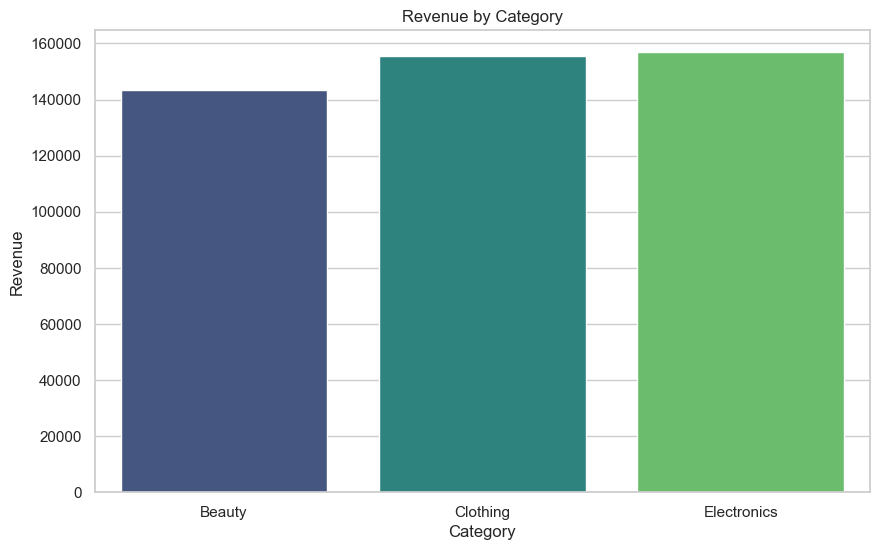

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Sales, x='Product Category', y='Total_revenue', estimator=sum, ci=None, palette='viridis')
plt.title('Revenue by Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.show()

Age Distribution (Histogram)

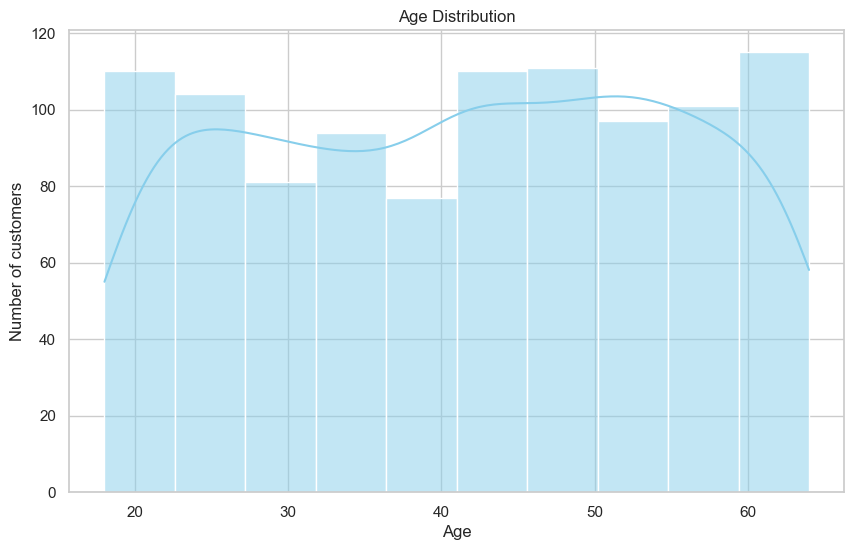

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(Sales['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

Monthly trend

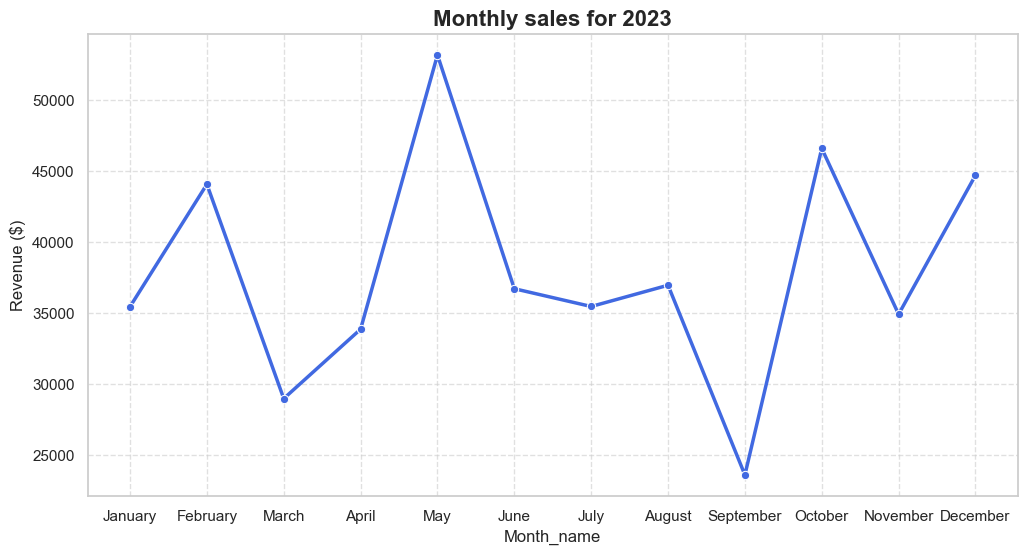

In [34]:
Sales_2023 = Sales[Sales['Year'] == 2023]
monthly_sales_2023 = Sales_2023.groupby(['Month_no', 'Month_name'])['Total_revenue'].sum().reset_index()
monthly_sales_2023 = monthly_sales_2023.sort_values('Month_no')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_2023, x='Month_name', y='Total_revenue', 
            marker='o',  color='royalblue', linewidth=2.5)
plt.title('Monthly sales for 2023', fontsize=16, fontweight='bold')
plt.xlabel('Month_name', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



Sales.head()

In [ ]:
Sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Yil,Month_no,Day,Month_name,Total_revenue,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,2023,11,24,November,150,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,2023,2,27,February,1000,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,2023,1,13,January,30,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,2023,5,21,May,500,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,2023,5,6,May,100,2023


Quantity bu Category (boxplot)

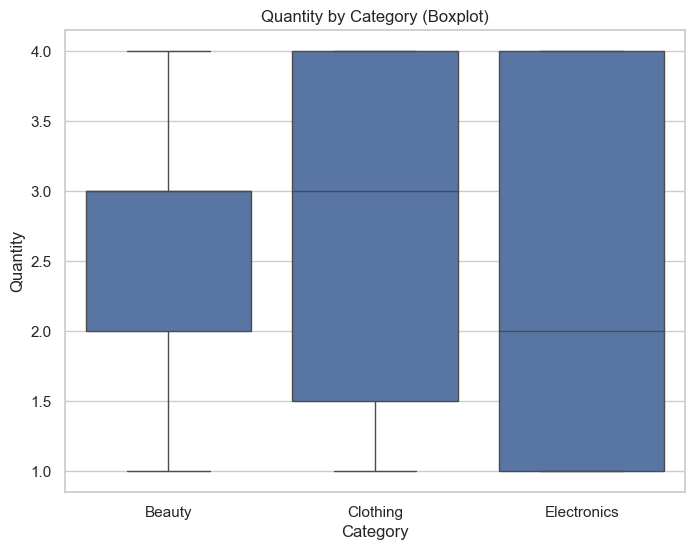

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(x="Product Category", y="Quantity", data=Sales)

plt.title("Quantity by Category (Boxplot)")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.show()


Correlation (Age vs Revenue)


In [29]:

correlation = Sales['Age'].corr(Sales['Total_revenue'])
print("Correlation (Age vs Revenue):", correlation)


Correlation (Age vs Revenue): -0.060568023883045656
